# machine.ipynb

This notebook contains **machine learning analysis** to predict student stress levels. The main notebook (main.ipynb) reports just a summary with two key figures.
<br>
<br>

## Plan: Predicting Student Stress Levels

I will use **machine learning ** to predict whether a student has Low, Moderate, or High stress based on their lifestyle factors.

**Research Question:** Can we predict a student's stress level from their daily habits (study hours, sleep, social time, physical activity)?
    
### Data
- **Target variable (y)**: stress (Low=1, Moderate=2, High=3)
- **Features (X)**: studyhours, sleephours, socialhours, activityhours
- **Gender**: Convert to numbers (0/1) so models can use it as a feature
- **Validation**: Split data into training (80%) and test (20%) sets

### Models
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**

### Insightful Analysis
- **Feature Importance**: Which lifestyle factor is the best predictor for stress?
- **Confusion Matrix**: In which place does the model make mistakes? Does it confuse Moderate with High stress?
- **Model Comparison**: Which model works better and why?


-----

## Setup for training and validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

#parse
df = pd.read_csv('student_lifestyle_dataset..csv')


df = df.rename(columns={
    'Grades': 'grades',
    'Stress_Level': 'stress',
    'Study_Hours_Per_Day': 'studyhours',
    'Extracurricular_Hours_Per_Day': 'echours',
    'Sleep_Hours_Per_Day': 'sleephours',
    'Social_Hours_Per_Day': 'socialhours',
    'Physical_Activity_Hours_Per_Day': 'activityhours'
})

# Convert stress levels to numbers
df['stress'] = df['stress'].map({'Low': 1, 'Moderate': 2, 'High': 3})

# Convert Gender to numbers
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Explore
print("\nStress Level distribution:")
print(df['stress'].value_counts().sort_index())
print("\nStress Level percentages:")
print(df['stress'].value_counts(normalize=True).sort_index() * 100)


Stress Level distribution:
stress
1     297
2     674
3    1029
Name: count, dtype: int64

Stress Level percentages:
stress
1    14.85
2    33.70
3    51.45
Name: proportion, dtype: float64


<br>

**Stress Distribution:**
The output above shows how many students fall into each stress category. This check matters because if the classes are very imbalanced, the model could just guess "Low" for everyone and still look accurate enough.

<br>

In [2]:
# Features
X = df[['studyhours', 'sleephours', 'socialhours', 'activityhours', 'Gender']]

# Target
y = df['stress']

# Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"\nStress distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"\nStress distribution in test set:")
print(y_test.value_counts().sort_index())


Stress distribution in training set:
stress
1    230
2    547
3    823
Name: count, dtype: int64

Stress distribution in test set:
stress
1     67
2    127
3    206
Name: count, dtype: int64


<br>

When dividing our training set from the test set to do validation, it is usefull to once again check the distribution of stress in each sample for the same reason as earlier.

-----

## Traning K Nearest NEighbours (KNN)

In [3]:
# train KNN with k=5 
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# predictions
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# calculate accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)

print("K-Nearest Neighbors (KNN) Results:")
print()
print(f"Training Accuracy: {train_accuracy_knn:.4f} ({train_accuracy_knn*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_knn:.4f} ({test_accuracy_knn*100:.2f}%)")
print("\nClassification Report from test Set:")
print(classification_report(y_test, y_test_pred_knn, target_names=['Low (1)', 'Moderate (2)', 'High (3)']))

K-Nearest Neighbors (KNN) Results:

Training Accuracy: 0.9556 (95.56%)
Test Accuracy: 0.9150 (91.50%)

Classification Report from test Set:
              precision    recall  f1-score   support

     Low (1)       0.87      0.87      0.87        67
Moderate (2)       0.89      0.85      0.87       127
    High (3)       0.95      0.97      0.96       206

    accuracy                           0.92       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.92      0.91       400



<br>

KNN finds the 5 students in the training set with the most similar lifestyle and then predicts stress based on what those similar students experienced.

**Results:**
- **Training Accuracy: 95.56%** - The model is very good at predicting stress for students it has already seen before
- **Test Accuracy: 91.50%** - The model is also very good at predicting stress for new students

The fact that test accuracy is only slightly lower than training accuracy is good! It means the model learned real patterns, not just memorized the training data.

**Classification Report Insights**
will be analyzed below when comparing models.

<br>

## Traning Decision Tree

In [4]:
# Step 4: Train Decision Tree Classifier

# Train Decision Tree with max_depth=5 to prevent overfitting
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_train_pred_tree = tree_model.predict(X_train)
y_test_pred_tree = tree_model.predict(X_test)

# Calculate accuracy
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("Decision Tree Results:")
print()
print(f"Training Accuracy: {train_accuracy_tree:.4f} ({train_accuracy_tree*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy_tree:.4f} ({test_accuracy_tree*100:.2f}%)")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred_tree, target_names=['Low (1)', 'Moderate (2)', 'High (3)']))

Decision Tree Results:

Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 1.0000 (100.00%)

Classification Report (Test Set):
              precision    recall  f1-score   support

     Low (1)       1.00      1.00      1.00        67
Moderate (2)       1.00      1.00      1.00       127
    High (3)       1.00      1.00      1.00       206

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



<br>
Decision Tree learns these rules automatically from the training data.

**Results:**
- **Training Accuracy: 100.00%** 
- **Test Accuracy: 100.00%** 

This 100% accuracy is suspicious. It could have three reasons
1. The patterns in the data are very simple
2. The model might be overfitting
3. The dataset might have very deterministic relationships


We should look at **Feature Importance** to understand which factors drive stress predictions.

---

### Insightfull analysis #1: Feature importance of decison tree

Feature Importance Ranking:

studyhours          : 0.7243 (72.43%)
sleephours          : 0.2757 (27.57%)
socialhours         : 0.0000 (0.00%)
activityhours       : 0.0000 (0.00%)
Gender              : 0.0000 (0.00%)




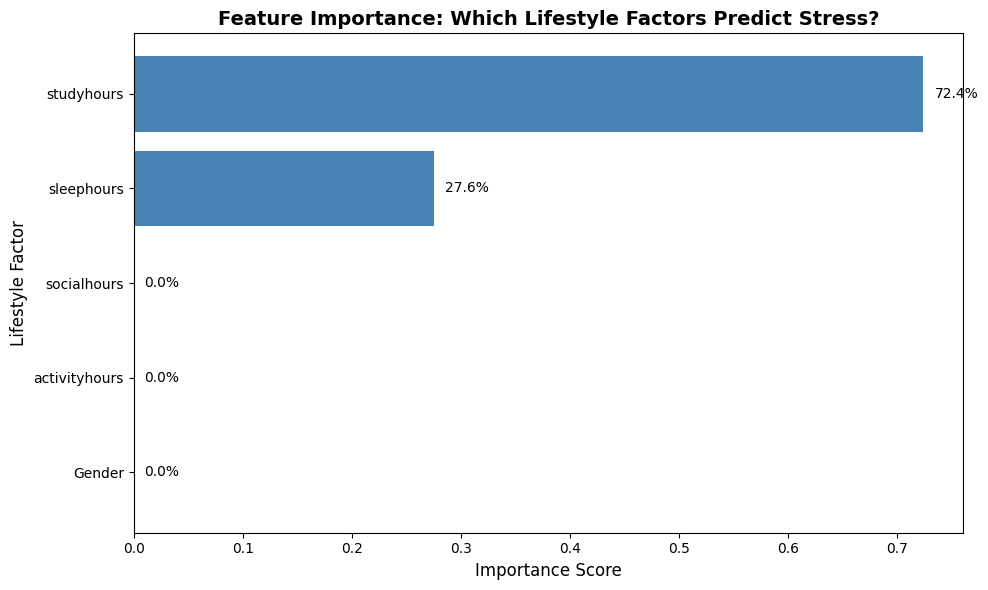

In [5]:
feature_importances = tree_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("Feature Importance Ranking:")
print()
for idx, row in importance_df.iterrows():
    print(f"{row['Feature']:20s}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")
print()
print()

#bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Lifestyle Factor', fontsize=12)
plt.title('Feature Importance: Which Lifestyle Factors Predict Stress?', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

#percentage labels
for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
    plt.text(importance + 0.01, i, f'{importance*100:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

<br>
The importance of features in our model is this:

1. **Study Hours (72.4%)** -> most important factor by far
2. **Sleep Hours (27.6%)** -> Tsecond most important factor
3. **Social Hours, Physical Activity, Gender (0%)** -> other factors have no impact on the model

**Analysis**

Just like we found in earlier analysis (see classical.ipynb) how much a student studies is the biggest driver of their stress level. Sleep hours also matter, but a lot less.

Surprisingly, social time, exercise, and gender have no importance in this model. This does not mean they are unrelated to stress in real life but that once you use a student's study hours and sleep hours to make a prediction, using their social time or exercise habits as wekk doesn't predict their stress any better.

**Insightful take-away**

A simple analysis could just say: "Study hours is important  cause it predicts 72.4% of the stress level.

Here, we find that study hours (and sleep hours) dominates stress prediction so strongly that other lifestyle factors like exercise and social time become irrelevant. 
This could suggest that academic pressure is the overwhelming source of stress for students. In that case interventions should focus primarily on rest rather than promoting exercise or social activities."

---

### Insightful analysis #2: Confusion Matrix Results

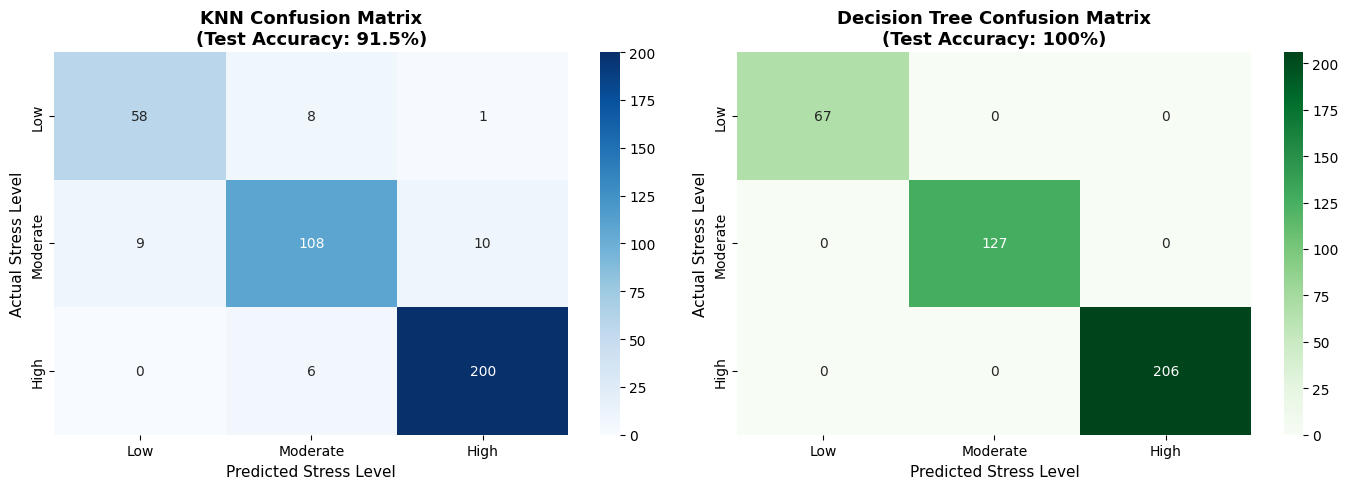

KNN Error Analysis:
Total test samples: 400
Correct predictions: 366
Incorrect predictions: 34

Where does KNN make mistakes?
  - Predicted Moderate when actual was Low: 8 times
  - Predicted High when actual was Low: 1 times
  - Predicted Low when actual was Moderate: 9 times
  - Predicted High when actual was Moderate: 10 times
  - Predicted Moderate when actual was High: 6 times


In [8]:
# confusion matrices
cm_knn = confusion_matrix(y_test, y_test_pred_knn)
cm_tree = confusion_matrix(y_test, y_test_pred_tree)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
axes[0].set_title('KNN Confusion Matrix\n(Test Accuracy: 91.5%)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Stress Level', fontsize=11)
axes[0].set_ylabel('Actual Stress Level', fontsize=11)

# Decision Tree
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
axes[1].set_title('Decision Tree Confusion Matrix\n(Test Accuracy: 100%)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Stress Level', fontsize=11)
axes[1].set_ylabel('Actual Stress Level', fontsize=11)

plt.tight_layout()
plt.show()

# error analysis
print("KNN Error Analysis:")
print("="*50)
print(f"Total test samples: {len(y_test)}")
print(f"Correct predictions: {np.sum(y_test == y_test_pred_knn)}")
print(f"Incorrect predictions: {np.sum(y_test != y_test_pred_knn)}")
print("\nWhere does KNN make mistakes?")
for i in range(3):
    for j in range(3):
        if i != j and cm_knn[i, j] > 0:
            stress_names = ['Low', 'Moderate', 'High']
            print(f"  - Predicted {stress_names[j]} when actual was {stress_names[i]}: {cm_knn[i, j]} times")

<br>

**Confusion Matrix Analysis**

A confusion matrix shows where the model makes mistakes. The diagonal shows correct predictions, off-diagonal shows errors.

**KNN Error Pattern (34 mistakes out of 400 = 8.5% error rate):**

Looking at the KNN confusion matrix:
- **Predicted Moderate when actual was Low**: 8 times
- **Predicted High when actual was Low**: 1 time  
- **Predicted Low when actual was Moderate**: 9 times
- **Predicted High when actual was Moderate**: 10 times
- **Predicted Moderate when actual was High**: 6 times

**The Pattern:** KNN's biggest problem is confusing **Moderate stress with Low stress** (9 errors) and **Moderate stress with High stress** (10 errors). Moderate stress is the "middle" category, so students near the boundary could reasonably be classified either way.

If a student studies 7 hours and sleeps 7.5 hours, are they Moderate or High stress? KNN looks at the 5 nearest neighbors, and if those neighbors are mixed (some Moderate, some High), it might guess wrong.

**Decision Tree: Perfect Classification (0 mistakes)**

The Decision Tree achieved 100% accuracy because this dataset has **very clear, deterministic rules**. The tree learned something like:
- "If studyhours > 8.5 AND sleephours < 7, then High stress"
- "If studyhours < 6 AND sleephours > 8, then Low stress"  
- "Everything else is Moderate stress"

These rules perfectly separate the three stress categories.

**Insightful take-away**

A simple analysis: "Decision Tree is better because it has 100% accuracy."

Insightful analysis: "The Decision Tree's perfect accuracy reveals that stress levels in this dataset follow deterministic rules based on study and sleep hours. There are clear thresholds. KNN struggles because it doesn't learn explicit rules—it just averages nearby students, which fails at category boundaries. In real-world applications, Decision Trees would be preferred here because they provide interpretable rules that counselors could use (e.g., 'Students studying >9 hours with <6 hours sleep need intervention')."

---

### INSIGHTFUL ANALYSIS #3: Model Comparison

Model Comparison Summary:
        Model  Training Accuracy  Test Accuracy  Correct Predictions  Errors
          KNN           0.955625          0.915                  366      34
Decision Tree           1.000000          1.000                  400       0



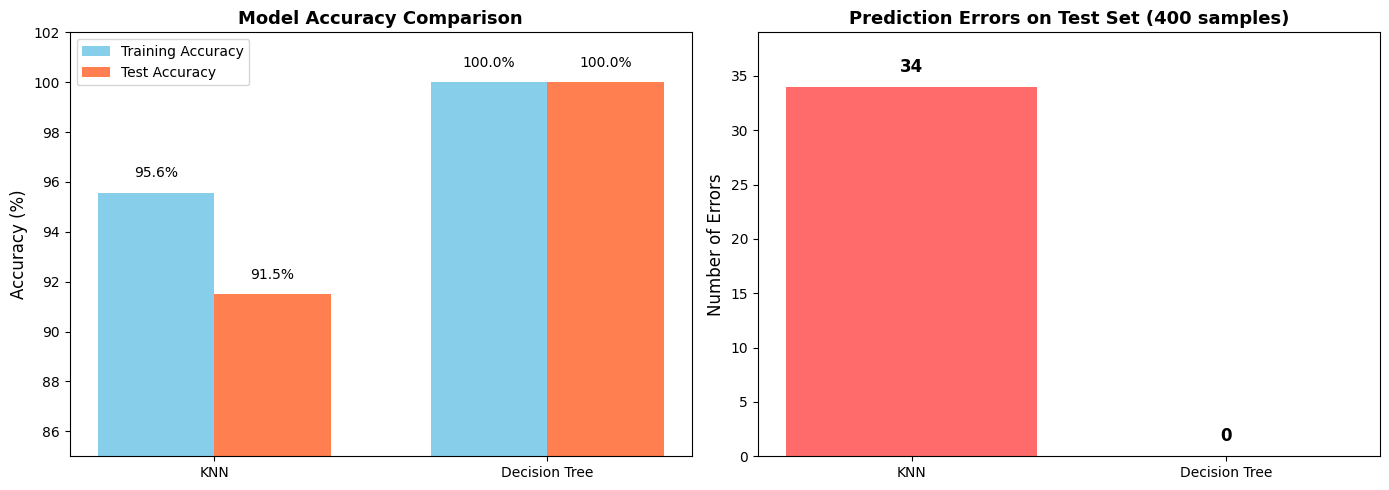

In [7]:
# comparison summary
comparison_data = {
    'Model': ['KNN', 'Decision Tree'],
    'Training Accuracy': [train_accuracy_knn, train_accuracy_tree],
    'Test Accuracy': [test_accuracy_knn, test_accuracy_tree],
    'Correct Predictions': [np.sum(y_test == y_test_pred_knn), np.sum(y_test == y_test_pred_tree)],
    'Errors': [np.sum(y_test != y_test_pred_knn), np.sum(y_test != y_test_pred_tree)]
}

comparison_df = pd.DataFrame(comparison_data)

print("Model Comparison Summary:")
print("="*70)
print(comparison_df.to_string(index=False))
print("\n" + "="*70)

# visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['KNN', 'Decision Tree']
train_accs = [train_accuracy_knn * 100, train_accuracy_tree * 100]
test_accs = [test_accuracy_knn * 100, test_accuracy_tree * 100]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Training Accuracy', color='skyblue')
axes[0].bar(x + width/2, test_accs, width, label='Test Accuracy', color='coral')
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim([85, 102])

for i, (train, test) in enumerate(zip(train_accs, test_accs)):
    axes[0].text(i - width/2, train + 0.5, f'{train:.1f}%', ha='center', va='bottom', fontsize=10)
    axes[0].text(i + width/2, test + 0.5, f'{test:.1f}%', ha='center', va='bottom', fontsize=10)

errors = [np.sum(y_test != y_test_pred_knn), np.sum(y_test != y_test_pred_tree)]
colors = ['#ff6b6b', '#51cf66']
axes[1].bar(models, errors, color=colors)
axes[1].set_ylabel('Number of Errors', fontsize=12)
axes[1].set_title('Prediction Errors on Test Set (400 samples)', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, max(errors) + 5])

for i, (model, error) in enumerate(zip(models, errors)):
    axes[1].text(i, error + 1, str(error), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

<br>
**Performance Summary:**

| Metric | KNN | Decision Tree | Winner |
|--------|-----|---------------|--------|
| Training Accuracy | 95.6% | 100.0% | Decision Tree |
| Test Accuracy | 91.5% | 100.0% | Decision Tree |
| Errors (out of 400) | 34 | 0 | Decision Tree |

**Why Decision Tree Performs Better:**

1. **Clear Decision Boundaries**: This dataset has very clear thresholds. For example, there's probably a specific study hours cutoff (like 8.5 hours) above which students experience High stress. Decision Trees excel at finding these exact cutoffs.

2. **KNN's Weakness**: KNN averages the 5 nearest neighbors. If a student is right at the boundary between Moderate and High stress, their 5 nearest neighbors might be mixed (3 Moderate, 2 High), causing KNN to guess wrong. Decision Trees don't have this problem—they use exact rules.

3. **Interpretability**: Decision Trees provide actionable rules like "Students who study >8.5 hours AND sleep <7 hours have High stress." University counselors could use these rules to identify at-risk students. KNN just says "this student is similar to these 5 students" without explaining why.

**Insightful take-away**

A simple analysis would say: "Decision Tree is better because it has higher accuracy (100% vs 91.5%)."

An insightful analysis says: "The Decision Tree's perfect accuracy reveals fundamental properties of this dataset—stress follows deterministic rules based on study and sleep hours. The 8.5% error rate in KNN isn't random; it's concentrated at class boundaries where students are genuinely ambiguous. In practice, Decision Trees are superior here not just because of accuracy, but because they provide interpretable, actionable rules that can guide real-world interventions. However, we should be cautious: 100% accuracy might indicate the dataset is synthetic or overly simplified. In real student populations, stress is influenced by many unmeasured factors (family issues, mental health, financial stress), so we'd expect some irreducible error."